# Part 9 - Dimensionality Reduction

## Principal Component Analysis

* From the $m$ independent variables of your dataset, PCA extracts $p\leq m$ new independent variables that explain the most variance of the dataset, __regardless of the dependent variable__.

__The fact that the dependent variable is not considered makes PCA an unsupervised model.__

In [21]:
# import the libraries that will be used
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from matplotlib.colors import ListedColormap

In [5]:
# import dataset
dir = '/disk1/sousae/Classes/udemy_machineLearning/Machine_Learning_A-Z/Part9_Dimensionality_Reduction/'
dataset = pd.read_csv(dir+'Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance) # ranked from the most variance to least variance

[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


In [8]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


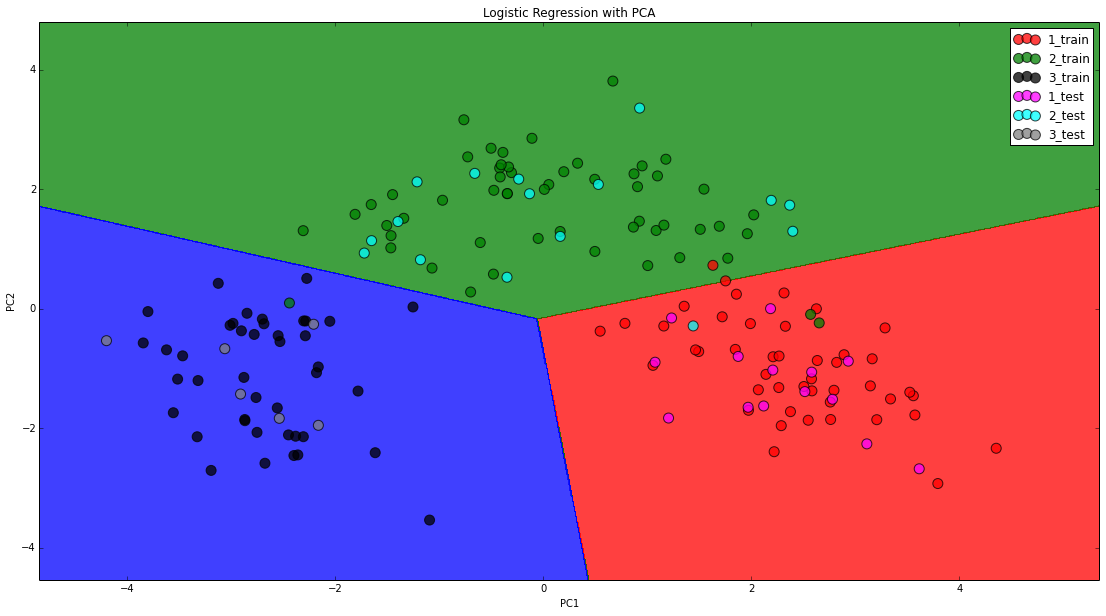

In [16]:
# Visualizing the training set results

def classifier_results(X_train,y_train, X_test,y_test,classifier,title, XX1, XX2):
    plt.figure(figsize=(19,10))
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                         np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
    
    plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap= ListedColormap(('red', 'green', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    ln = [' ','1_train','2_train','3_train']
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j, 0], X_set[y_set==j,1],
                    c=ListedColormap(('red','green','black'))(i), label=ln[j], s=100, alpha=0.75)
        
    lt = [' ','1_test','2_test','3_test']
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_test[y_test==j, 0], X_test[y_test==j,1],
                    c=ListedColormap(('magenta','cyan','grey'))(i), label=lt[j], s=100, alpha=0.75)
        
    plt.title(title)
    plt.xlabel(XX1)
    plt.ylabel(XX2)
    plt.legend()
        
classifier_results(X_train,y_train, X_test,y_test,classifier,'Logistic Regression with PCA','PC1','PC2')

## Linear Discriminant Analysis

* From the $n$ independet variables of your dataset, LDA extracts $p\leq n$ new independent variables that separate the most classes of the dependent variable.

__The fact that the dependent variable is considered makes LDA a supervised model__.

In [17]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


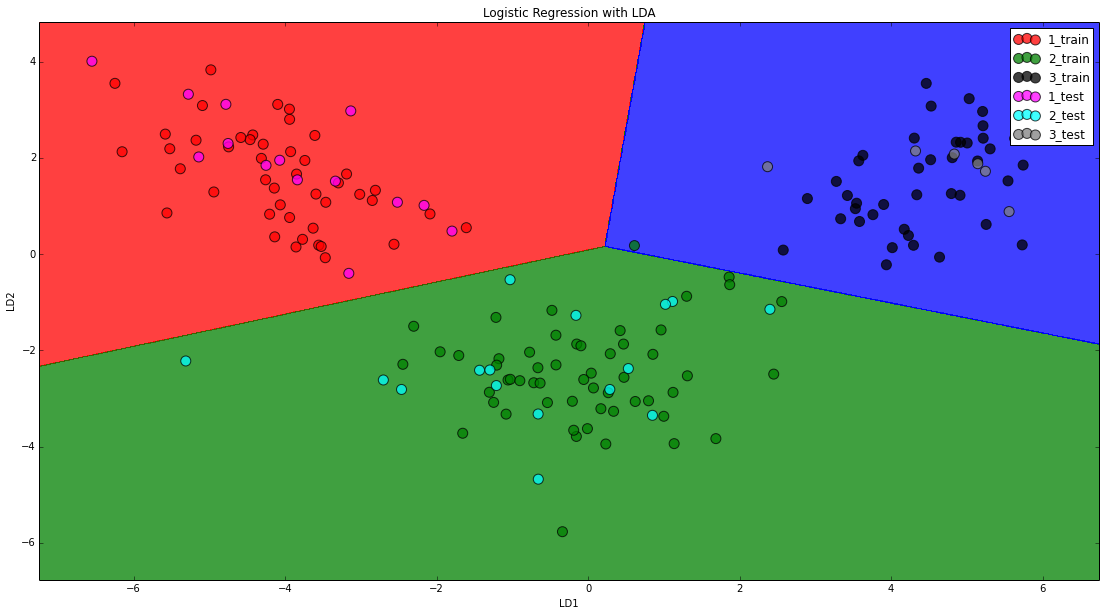

In [19]:
classifier_results(X_train,y_train, X_test,y_test,classifier,'Logistic Regression with LDA','LD1','LD2')

## Kernel PCA

* usefull for non-linearly separable data

In [20]:
# import dataset
dir = '/disk1/sousae/Classes/udemy_machineLearning/Machine_Learning_A-Z/Part9_Dimensionality_Reduction/'
dataset = pd.read_csv(dir+'Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [22]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Kernel PCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 6 26]]


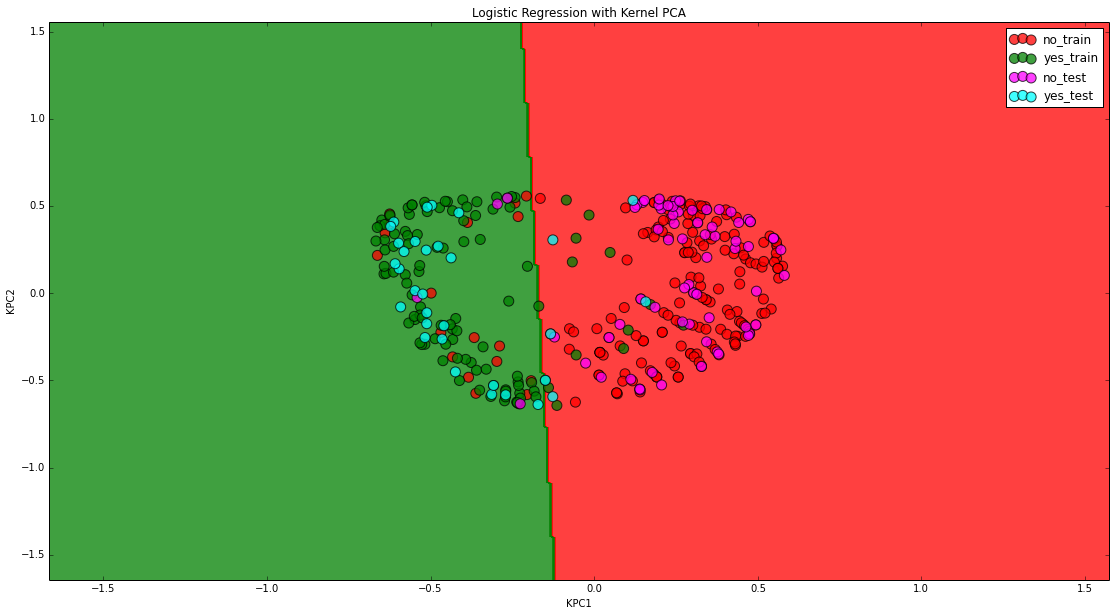

In [25]:
# Visualizing the training set results

def classifier_data_and_results(X_train,y_train, X_test,y_test,classifier,title):
    plt.figure(figsize=(19,10))
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                         np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
    
    plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap= ListedColormap(('red', 'green')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    ln = ['no_train','yes_train']
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j, 0], X_set[y_set==j,1],
                    c=ListedColormap(('red','green'))(i), label=ln[j], s=100, alpha=0.75)
        
    lt = ['no_test','yes_test']
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_test[y_test==j, 0], X_test[y_test==j,1],
                    c=ListedColormap(('magenta','cyan'))(i), label=lt[j], s=100, alpha=0.75)
        
    plt.title(title)
    plt.xlabel('KPC1')
    plt.ylabel('KPC2')
    plt.legend()
        
classifier_data_and_results(X_train,y_train, X_test,y_test,classifier,'Logistic Regression with Kernel PCA')